In [50]:
import pandas as pd
import numpy as np
import scipy.stats as  sp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [51]:
l=pd.read_csv('train.csv')
loan=l

In [52]:
l.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001098,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [53]:
l.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA

In [54]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [55]:
l.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
l.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [57]:
l=l.drop(['Loan_ID'],axis=1)
l

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
l= l[l['LoanAmount'].notna()]
l['Loan_Amount_Term'].fillna(l['Loan_Amount_Term'].mean(),inplace=True)
l['Credit_History'].fillna(l['Credit_History'].mean(),inplace=True)

In [59]:
l.isnull().sum()

Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### filling null values

In [60]:
l['Gender'].fillna(l['Gender'].mode()[0],inplace=True)
l['Married'].fillna(l['Married'].mode()[0],inplace=True)

In [61]:
l['Dependents']=l['Dependents'].str.replace('+',"")

In [62]:
l['Dependents'].fillna(l['Dependents'].mode()[0],inplace=True)
#l=l.astype({'Dependents':int})
l['Dependents']=l['Dependents'].astype(int)

In [63]:
l.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
l[((l['Education']=='Graduate') & (l['Self_Employed']=='Yes'))].shape[0]/592*100



10.472972972972974

In [65]:
l[((l['Education']!='Graduate') & (l['Self_Employed']=='No'))].shape[0]/592*100

17.56756756756757

In [66]:
l[((l['Education']!='Graduate') & (l['Self_Employed']=='Yes'))].shape[0]/592*100

2.871621621621622

In [67]:
l[((l['Education']=='Graduate') & (l['Self_Employed']!='Yes'))].shape[0]/592*100

68.07432432432432

In [68]:
l.shape

(592, 12)

In [69]:
l['Self_Employed'].fillna('No',inplace=True)

In [70]:
l.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [71]:
l.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [72]:
df=l.copy()

In [73]:
#df.drop(columns='Loan_ID',inplace=True)

In [74]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## knowning the categorical values

In [75]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [76]:
df.Married.unique()

array(['Yes', 'No'], dtype=object)

In [77]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [78]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [79]:
df.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [80]:
df.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder


In [82]:
label_encoders={}

In [83]:
categorical_columns=['Married','Education','Self_Employed','Property_Area','Loan_Status','Gender']
for col in categorical_columns:
  label_encoders[col]=LabelEncoder()
  df[col]=label_encoders[col].fit_transform(df[col])

In [84]:
df['ApplicantIncome']=(df['ApplicantIncome']-min(df['ApplicantIncome']))/(max(df['ApplicantIncome'])-min(df['ApplicantIncome']))
df['CoapplicantIncome']=(df['CoapplicantIncome']-min(df['CoapplicantIncome']))/(max(df['CoapplicantIncome'])-min(df['CoapplicantIncome']))
df['LoanAmount']=(df['LoanAmount']-min(df['LoanAmount']))/(max(df['LoanAmount'])-min(df['LoanAmount']))
df['Loan_Amount_Term']=(df['Loan_Amount_Term']-min(df['Loan_Amount_Term']))/(max(df['Loan_Amount_Term'])-min(df['Loan_Amount_Term']))
#standardise

In [85]:
df.head()#Gender Male--> 1
# married--> 1 Yes
# edu --> grad=0
# selfemp->NO=0
#Loan satus-->no =0
#property==0 rural , 2=urban, 1 semi urban

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1
5,1,1,2,0,1,0.065145,0.100703,0.373372,0.74359,1.0,2,1


In [86]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [87]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.815878,0.652027,0.744932,0.214527,0.133446,0.064988,0.039423,0.198860,0.705439,0.843462,1.030405,0.694257
std,0.387911,0.476730,1.009670,0.410841,0.340344,0.076241,0.071225,0.123860,0.138167,0.348296,0.784206,0.461111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033856,0.000000,0.131693,0.743590,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045220,0.029304,0.172214,0.743590,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.069320,0.055488,0.230101,0.743590,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [88]:

corr = df.corr()
corr.style.background_gradient(cmap='cool').set_precision(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.37,0.19,0.05,0.01,0.06,0.08,0.11,-0.08,0.01,-0.03,0.03
Married,0.37,1.00,0.34,0.01,0.01,0.05,0.07,0.15,-0.10,0.01,0.01,0.09
Dependents,0.19,0.34,1.00,0.04,0.05,0.13,0.04,0.17,-0.10,-0.02,0.00,0.02
Education,0.05,0.01,0.04,1.00,0.00,-0.13,-0.07,-0.17,-0.07,-0.07,-0.08,-0.07
Self_Employed,0.01,0.01,0.05,0.00,1.00,0.13,-0.01,0.12,-0.04,0.00,-0.02,-0.01
ApplicantIncome,0.06,0.05,0.13,-0.13,0.13,1.00,-0.11,0.57,-0.05,-0.02,-0.00,-0.00
CoapplicantIncome,0.08,0.07,0.04,-0.07,-0.01,-0.11,1.00,0.19,-0.06,-0.00,0.01,-0.07
LoanAmount,0.11,0.15,0.17,-0.17,0.12,0.57,0.19,1.00,0.04,-0.01,-0.05,-0.04
Loan_Amount_Term,-0.08,-0.10,-0.10,-0.07,-0.04,-0.05,-0.06,0.04,1.00,0.01,-0.07,-0.03
Credit_History,0.01,0.01,-0.02,-0.07,0.00,-0.02,-0.00,-0.01,0.01,1.00,-0.01,0.54


In [89]:
cat = df.columns.to_list()
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

## visualization of loan status on few parameters

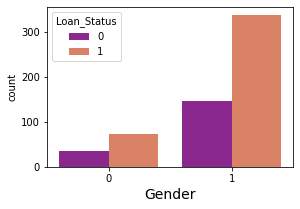

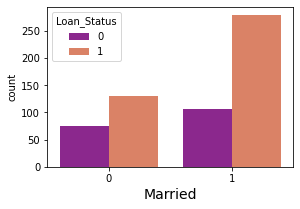

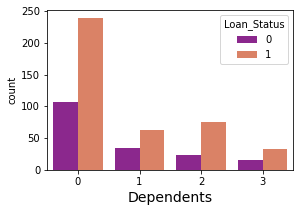

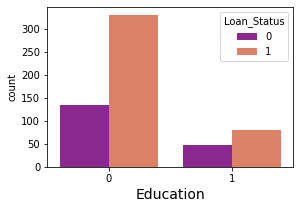

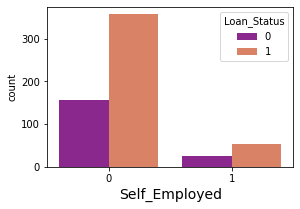

In [90]:
import matplotlib.pyplot as plt 

for i in cat[:-7]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma',)
    plt.xlabel(i, fontsize=14)

# running decisioin tree , logistic and SVC 


In [91]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [92]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.20,
                                                    random_state = 0)

In [93]:
model = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

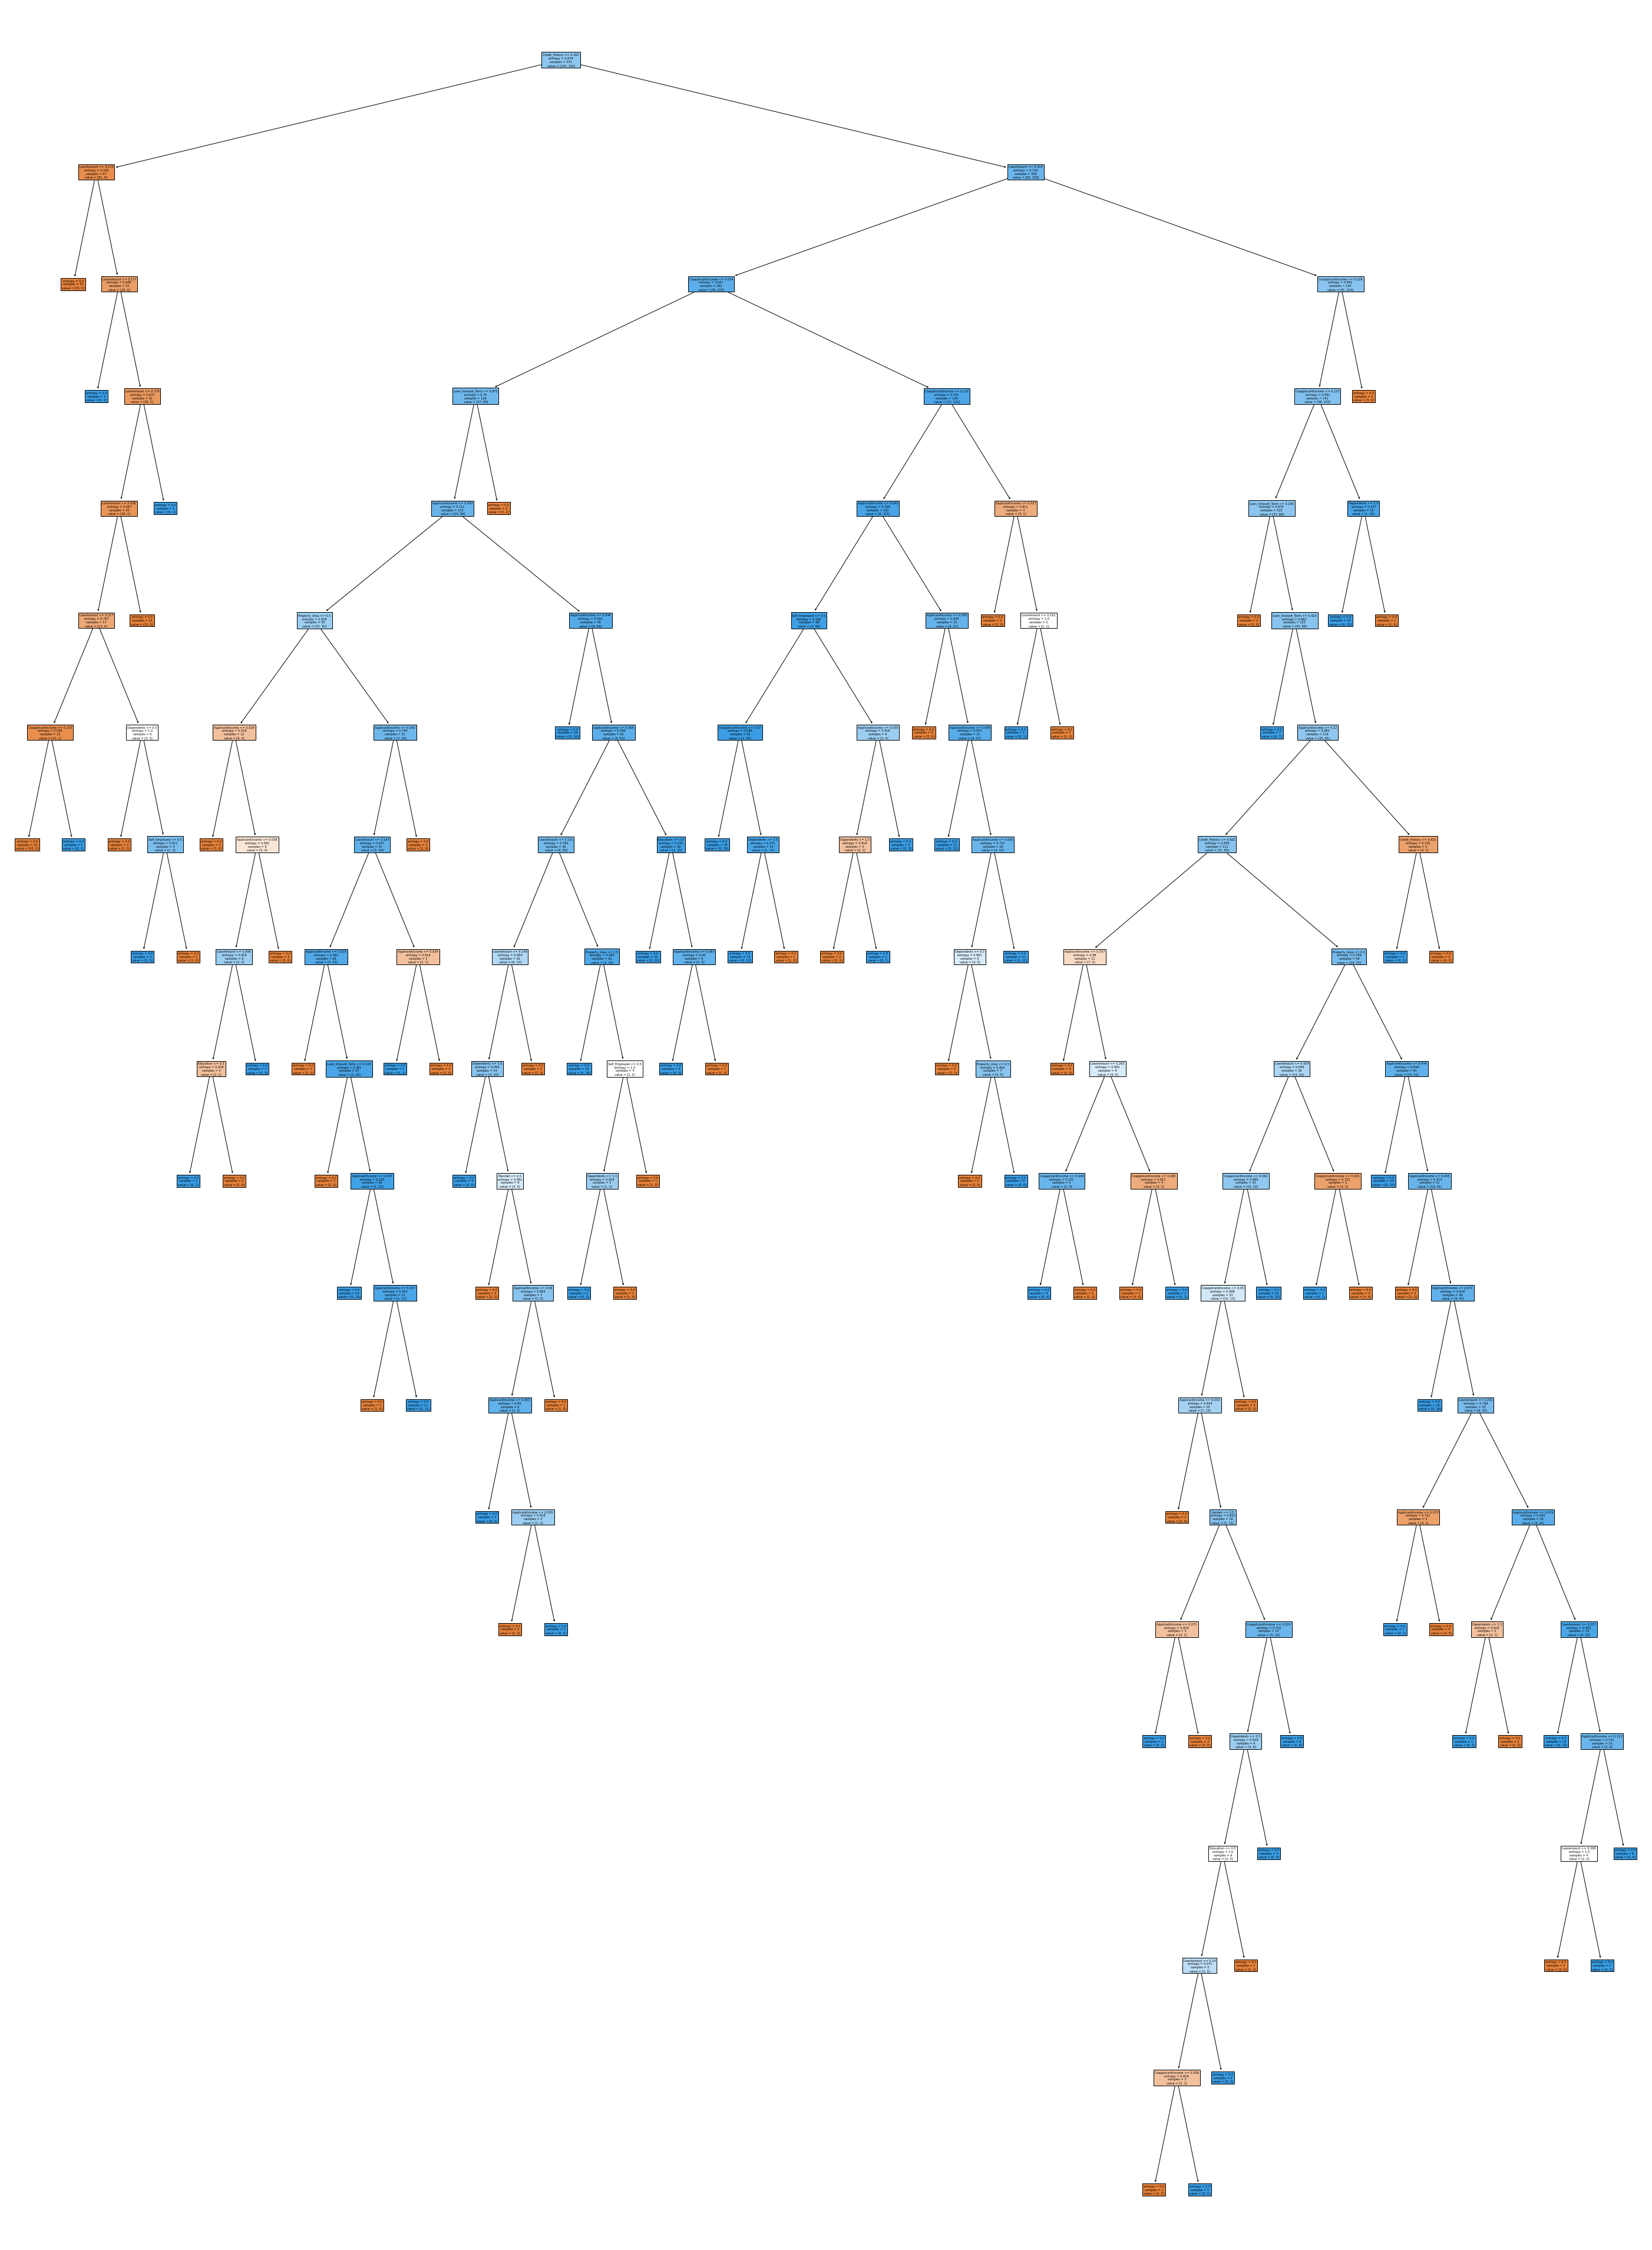

In [94]:
plt.figure(figsize=(50,70))
plot_tree(model,filled=True,feature_names=cat[:-1])
plt.show()

In [95]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0])

In [96]:
model.score(X_test,Y_test)

0.7058823529411765

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(X_train, Y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
#print(classification_report(Y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,Y_test)
print('accuracy is',accuracy_score(y_predict,Y_test))


accuracy is 0.7983193277310925


In [98]:
from sklearn.svm import SVC
model = SVC()

# fit the model with the training data
model.fit(X_train,Y_train)

# # predict the target on the train dataset
# predict_train = model.predict(X_train)
# print('Target on train data',predict_train) 

# # Accuray Score on train dataset
# accuracy_train = accuracy_score(,predict_train)
# print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(Y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on test data [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0]
accuracy_score on test dataset :  0.7983193277310925
